# Python Course for Newton: Part II



## Numpy  
Numpy makes it easier to work with multidimensional data. Some of the basics are shown below, but do have a look at the official documentation: https://docs.scipy.org/doc/numpy/user/index.html

In [1]:
import numpy as np

In [18]:
# Initialize a matrix
A = np.array([[1, 2, 3, 1],
              [3, 2, 5, 2],
              [0, 4, 1, 2]])

# Initialize a vector
B = np.array([4, 2, 1, 0])

# Compute the dot product of A and B
print(np.dot(A, B))

# Numpy makes it easy to do arithmetic on each individual element in the matrix
print(A ** 2)

# Compute the transpose matrix
print(A.T)


[11 21  9]
[[ 1  4  9  1]
 [ 9  4 25  4]
 [ 0 16  1  4]]
[[1 3 0]
 [2 2 4]
 [3 5 1]
 [1 2 2]]


### Matrix manipulation  

Define a function that, given a matrix A, returns the same matrix but with the last row and column omitted. So,  
\[\[ 1,  2,  3,  4\],  
  \[ 5,  6,  7,  8\],  
  \[ 9, 10, 11, 12\]\]  
gives  
\[\[ 1,  2,  3\],  
  \[ 5,  6,  7\]\]



In [ ]:
def omit_last_row_column(A):
    pass  # Replace this line with your implementation!

### Loading data

Now we have seen basic interaction with the data structures of NumPy. Now we are going to use NumPy for loading data from text files. In the `iris` folder, you will find a file called `iris.txt`. Open this file and see its content. Can you see what `delimiter` is used? What data types does this file contain?



** Exercise ** Load the Iris data set using NumPy's `loadtxt` function into a variable. Make sure you use the right parameters. Then print the first row of the data.  

In [ ]:
# Your code here

### Writing data

After you have completed the previous exercise, we now want to write the data back to a new file. NumPy has a convinient method `savetxt` to do this. Before doing the exercise, look at the documentation of the `savetxt` function to see which parameters you can use. [Documentation here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html)

** Exercise ** Save the previously created array to a new file in the `iris` folder. This time we only want the second column of the array *Hint: Remember from the lecture how to return specific columns.* ** DO NOT CALL THIS `iris.txt`, you will need the original data later!**

In [ ]:
# Your code here

### Statistical functions

**Exercise** Print the mean, minimum, maximum, standard deviation of the columns of the iris data set. Remember the `axis` parameter.

In [34]:
# Your code here

## Matplotlib

### Line plot

From this section, we are going to use another Python library: `pandas`. This library bundles a lot of helpful tools to read data and deal with missing data. 

In order to use the data in the `climate-change-earth-surface-temperature-data` folder, we need `pandas` to load the data, because it takes care of the missing data and interpretation of the dates. This exercise will use the CSV file `GlobalTemperatures.csv`, which contains the global temperature data starting from 1750. Open this file in Notepad or another simple text editor to see how this file is structured.

**Exercise** Plot a line graph with the time on the x-axis and "LandTemperatures" on the y-axis. The matrix with the necessary data is stored in the `temperature` variable. Make sure you include a title and labels for the x and y axis. *Hint: Start by printing the shape of the data and compare it to the CSV file.*

In [23]:
# This part is given

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df = pd.read_csv("climate-change-earth-surface-temperature-data/GlobalTemperatures.csv", delimiter=",",  parse_dates=[0], infer_datetime_format=True)
temperatures = df.as_matrix()

# Place your code below



### Trend line

After completing the previous exercise, you will notice that there is a lot of data. Not very useful to to detect trends. Now the data is grouped by year and given to you in the `yearly_temps` variable.

It would be useful to display a trend line. The NumPy function `np.polyfit(x, y, order)` can create such a trend line. However, using dates requires conversion to work properly. Therefore the variable `x_dates` is given. The code snippet below is given to help you create the trendline.

```python
a = np.polyfit(x_dates, y, order)
trendline = np.poly1d(a)(x_dates)
```

This creates an array `trendline`. You can use this variable to plot a line.

**Exercise** Repeat the previous exercise and plot a trend line using the snippet above where you fill in the  `y` parameter with the correct array and fill in different `order` values to create different kind of trend lines.

In [24]:
# This part is given

df_yearly = df.groupby(pd.Grouper(key='dt', freq='1y')).mean()
yearly_temps = df_yearly.reset_index().as_matrix()
x_dates = range(yearly_temps.shape[0])

# Place your code below


### Scatter plot

Recall the previous `iris.txt` data set. We are going to visualize the relation between two variables in the data set. 

**Exercise** Use matplotlibs function `plt.scatter` to make a scatter plot to visualize the relation between the second column and the fourth column of the array. Make sure you include a title and labels.

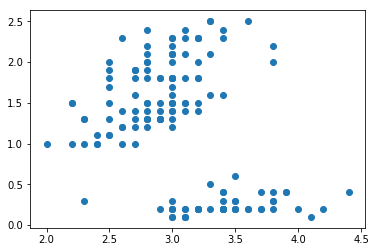

In [29]:
# Your code here

#### Bonus

After completing the previous exercise, you will notice a clear separation in the data.

**Exercise** Repeat the previous exercise and add a line to plot to indicate the separation that exists in the data

In [30]:
# Your code here

## Scipy

### Integration

Remember from the first exercise session how you could create functions. Now we will use function in a mathematical way, by integrating the function on a given interval. SciPy's `quad` function does this for you. Have a look at the [documentation](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.quad.html) for the parameters.

**Exercise** Define your own function and integrate this function on the interval `[0,1]`. For example the function `y=x`. Print the result of the integration and interpret the results. 


In [42]:
# This code is given

from scipy.integrate import quad

# Your code here



## Solutions

### Matrix manipulation

In [17]:
a = np.array([[ 1, 2, 3, 4],
              [ 5, 6, 7, 8],
              [ 9, 10, 11, 12]])

def omit_last_row_column(A):
    return A[:-1, :-1]

# Or alternatively,

def omit_last_row_column(A):
    rows, columns = A.shape
    result = np.zeros(shape=(rows - 1, columns - 1))
    for row in range(rows - 1):
        for column in range(columns - 1):
            result[row, column] = A[row, column]
    return result

print(omit_last_row_column(a))

[[1 2 3]
 [5 6 7]]


### Loading data


In [20]:
import numpy as np

a = np.loadtxt('iris/iris.txt', delimiter=',')
print(a[0])

[5.1 3.5 1.4 0.2]


### Writing data

In [19]:
import numpy as np

a = np.loadtxt('iris/iris.txt', delimiter=',')
np.savetxt('iris/1.txt', a[:,1], delimiter=',')

### Statistical Functions

In [35]:
import numpy as np

a = np.loadtxt('iris/iris.txt', delimiter=',')
print(np.mean(a, axis=0))
print(np.min(a, axis=0))
print(np.max(a, axis=0))
print(np.std(a, axis=0))

[5.84333333 3.054      3.75866667 1.19866667]
[4.3 2.  1.  0.1]
[7.9 4.4 6.9 2.5]
[0.82530129 0.43214658 1.75852918 0.76061262]


### Line plot

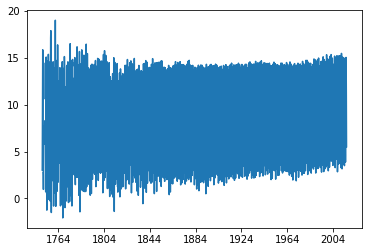

In [31]:
# This part is given

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df = pd.read_csv("climate-change-earth-surface-temperature-data/GlobalTemperatures.csv", delimiter=",",  parse_dates=[0], infer_datetime_format=True)
temperatures = df.as_matrix()

# Place your code below

plt.plot(temperatures[:, 0], temperatures[:, 1])
plt.show()

### Trend line

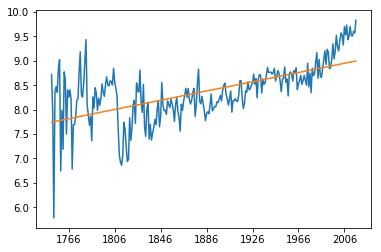

In [37]:
# This part is given
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df_yearly = df.groupby(pd.Grouper(key='dt', freq='1y')).mean()
yearly_temps = df_yearly.reset_index().as_matrix()
x_dates = range(yearly_temps.shape[0])

# Place your code below

plt.plot(yearly_temps[:, 0], yearly_temps[:, 1])
a = np.polyfit(x_dates, yearly_temps[:, 1], 1)
trendline = np.poly1d(a)(x_dates)
plt.plot(yearly_temps[:, 0], trendline)
plt.show()

### Scatter plot

In [ ]:
import matplotlib.pyplot as plt

a = np.loadtxt('iris/iris.txt', delimiter=',')

plt.scatter(a[:, 1], a[:, 3])
plt.show()

### Integration

In [ ]:
# This code is given

from scipy.integrate import quad

# Your code here

def func(x):
    return x + 3

print(quad(func, 0, 2))